## Credit Card Fraud Analysis

## Objective

The Credit Card Fraud Detection Project aims to implement an advanced system for the identification and prevention of fraudulent credit card transactions.

## Feature

Unnamed: 0: This column seems to be an unnamed or default index column that might have been added during data processing. It doesn't provide specific information about the transactions.

trans_date_trans_time: Date and time of the transaction. This column likely combines both the date and time information of the transaction.

cc_num: Credit card number used for the transaction. This information is often anonymized or partially redacted for privacy reasons in real datasets.

merchant: The name or identifier of the merchant where the transaction took place.

category: The category or type of the transaction (e.g., retail, dining, entertainment).

amt: The transaction amount, indicating the monetary value of the transaction.

first: The first name of the person associated with the credit card.

last: The last name of the person associated with the credit card.

gender: The gender of the cardholder.

street: The street address of the cardholder.

city: The city where the cardholder resides.

state: The state where the cardholder resides.

zip: The ZIP code of the cardholder's location.

lat: Latitude of the cardholder's location.

long: Longitude of the cardholder's location.

city_pop: The population of the city where the cardholder resides.

job: The occupation or job of the cardholder.

dob: Date of birth of the cardholder.

trans_num: Transaction number or identifier.

unix_time: The transaction time in Unix timestamp format (seconds since January 1, 1970).

merch_lat: Latitude of the merchant location.

merch_long: Longitude of the merchant location.

is_fraud: Binary indicator (0 or 1) indicating whether the transaction is fraudulent (1) or not (0).

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import great_circle
from category_encoders import WOEEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import copy

In [2]:
df=pd.read_csv(r"C:\Users\sanyu\Downloads\archive (10)\fraudTest.csv")
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [3]:
df.isnull().sum() 

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [4]:
df.describe

<bound method NDFrame.describe of         Unnamed: 0 trans_date_trans_time            cc_num  \
0                0   2020-06-21 12:14:25  2291163933867244   
1                1   2020-06-21 12:14:33  3573030041201292   
2                2   2020-06-21 12:14:53  3598215285024754   
3                3   2020-06-21 12:15:15  3591919803438423   
4                4   2020-06-21 12:15:17  3526826139003047   
...            ...                   ...               ...   
555714      555714   2020-12-31 23:59:07    30560609640617   
555715      555715   2020-12-31 23:59:09  3556613125071656   
555716      555716   2020-12-31 23:59:15  6011724471098086   
555717      555717   2020-12-31 23:59:24     4079773899158   
555718      555718   2020-12-31 23:59:34  4170689372027579   

                                    merchant        category     amt    first  \
0                      fraud_Kirlin and Sons   personal_care    2.86     Jeff   
1                       fraud_Sporer-Keebler   personal_car

In [4]:
df['is_fraud'].value_counts()  

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [5]:
df1 = copy.deepcopy(df) 

In [6]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'],format='mixed') 

In [ ]:
# from trans_date_trans_time column i create columns hour,day,month

In [7]:
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day'] = df['trans_date_trans_time'].dt.day_name()
df['month'] = df['trans_date_trans_time'].dt.month

In [8]:
df.sort_values(['cc_num', 'trans_date_trans_time'])
df['hours_diff_bet_trans']=((df.groupby('cc_num')[['trans_date_trans_time']].diff())/np.timedelta64(1,'h')) 

In [9]:
df.loc[df['hours_diff_bet_trans'].isna(),'hours_diff_bet_trans'] = 0
df['hours_diff_bet_trans'] = df['hours_diff_bet_trans'].astype(int) 

In [ ]:
# create the colunm weekdays

In [10]:
df['day'] = df['trans_date_trans_time'].dt.weekday

In [11]:
df.drop(columns=['cc_num','trans_date_trans_time'],inplace=True)  

In [ ]:
# Weight of Evidence (WoE) encoding is a technique commonly used in credit scoring.
# WoE encoding focuses on understanding the relationship between a categorical variable and a binary target variable 

In [12]:
for col in ['city','job','merchant', 'category']:
    df[col] = WOEEncoder().fit_transform(df[col],df['is_fraud']) 

In [13]:
df.drop(columns=['Unnamed: 0','street','state','first','last','trans_num','unix_time'],inplace=True) 

In [14]:
df.drop(columns='gender', axis=1,inplace=True)

In [15]:
df.drop(columns='dob', axis=1,inplace=True)

In [208]:
df

,merchant,category,amt,city,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,hour,day,month,hours_diff_bet_trans
0,0.340113,-0.762903,2.86,-0.910702,29209,33.9659,-80.9355,333497,-2.243730,33.986391,-81.200714,0,12,6,6,0
1,-0.420209,-0.762903,29.84,-1.178691,84002,40.3207,-110.4360,302,-2.286016,39.450498,-109.960431,0,12,6,6,0
2,-0.381243,-0.985812,41.28,-1.426818,11710,40.6729,-73.5365,34496,0.472088,40.495810,-74.196111,0,12,6,6,0
3,0.374766,-0.606015,60.05,1.467115,32780,28.5697,-80.8191,54767,1.467115,28.812398,-80.883061,0,12,6,6,0
4,0.331972,-0.498900,3.19,-1.241139,49632,44.2529,-85.0170,1126,-1.241139,44.959148,-85.884734,0,12,6,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,0.022898,-0.985812,43.77,1.610746,63453,40.4931,-91.8912,519,0.605342,39.946837,-91.333331,0,23,3,12,4
555715,0.026875,-1.049973,111.84,-1.456178,77566,29.0393,-95.4401,28739,-1.900655,29.661049,-96.186633,0,23,3,12,2
555716,-0.009315,-1.049973,86.88,-1.870046,99323,46.1966,-118.9017,3684,-2.309014,46.658340,-119.715054,0,23,3,12,0
555717,-0.296997,-0.498900,7.99,-1.232130,83643,44.6255,-116.4493,129,-1.232130,44.470525,-117.080888,0,23,3,12,3


In [ ]:
# smote analysis

In [16]:
x = df.drop(columns='is_fraud', axis=1)
y = df['is_fraud']

In [17]:
from collections import Counter
from imblearn.over_sampling import SMOTE
smt = SMOTE() 
X1, Y1 = smt.fit_resample(x, y)

In [ ]:
# concate into another dataframe.

In [18]:
columns = x.columns.tolist() + ['is_fraud']
df2= pd.DataFrame(np.column_stack([X1,Y1]), columns=columns)

In [20]:
df2['is_fraud'].value_counts()  

is_fraud
0.0    553574
1.0    553574
Name: count, dtype: int64

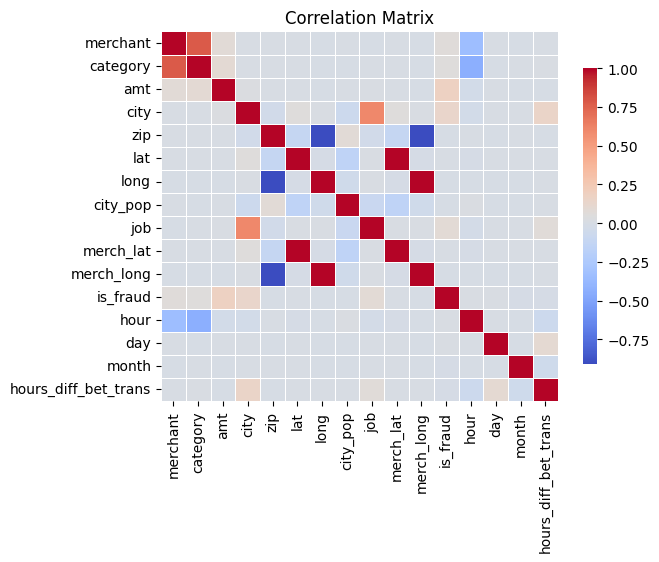

In [212]:
sns.heatmap(df.select_dtypes(include='number').corr(),
            annot=None,cmap='coolwarm',fmt='.2f',linewidths=0.5,cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix')
plt.show()

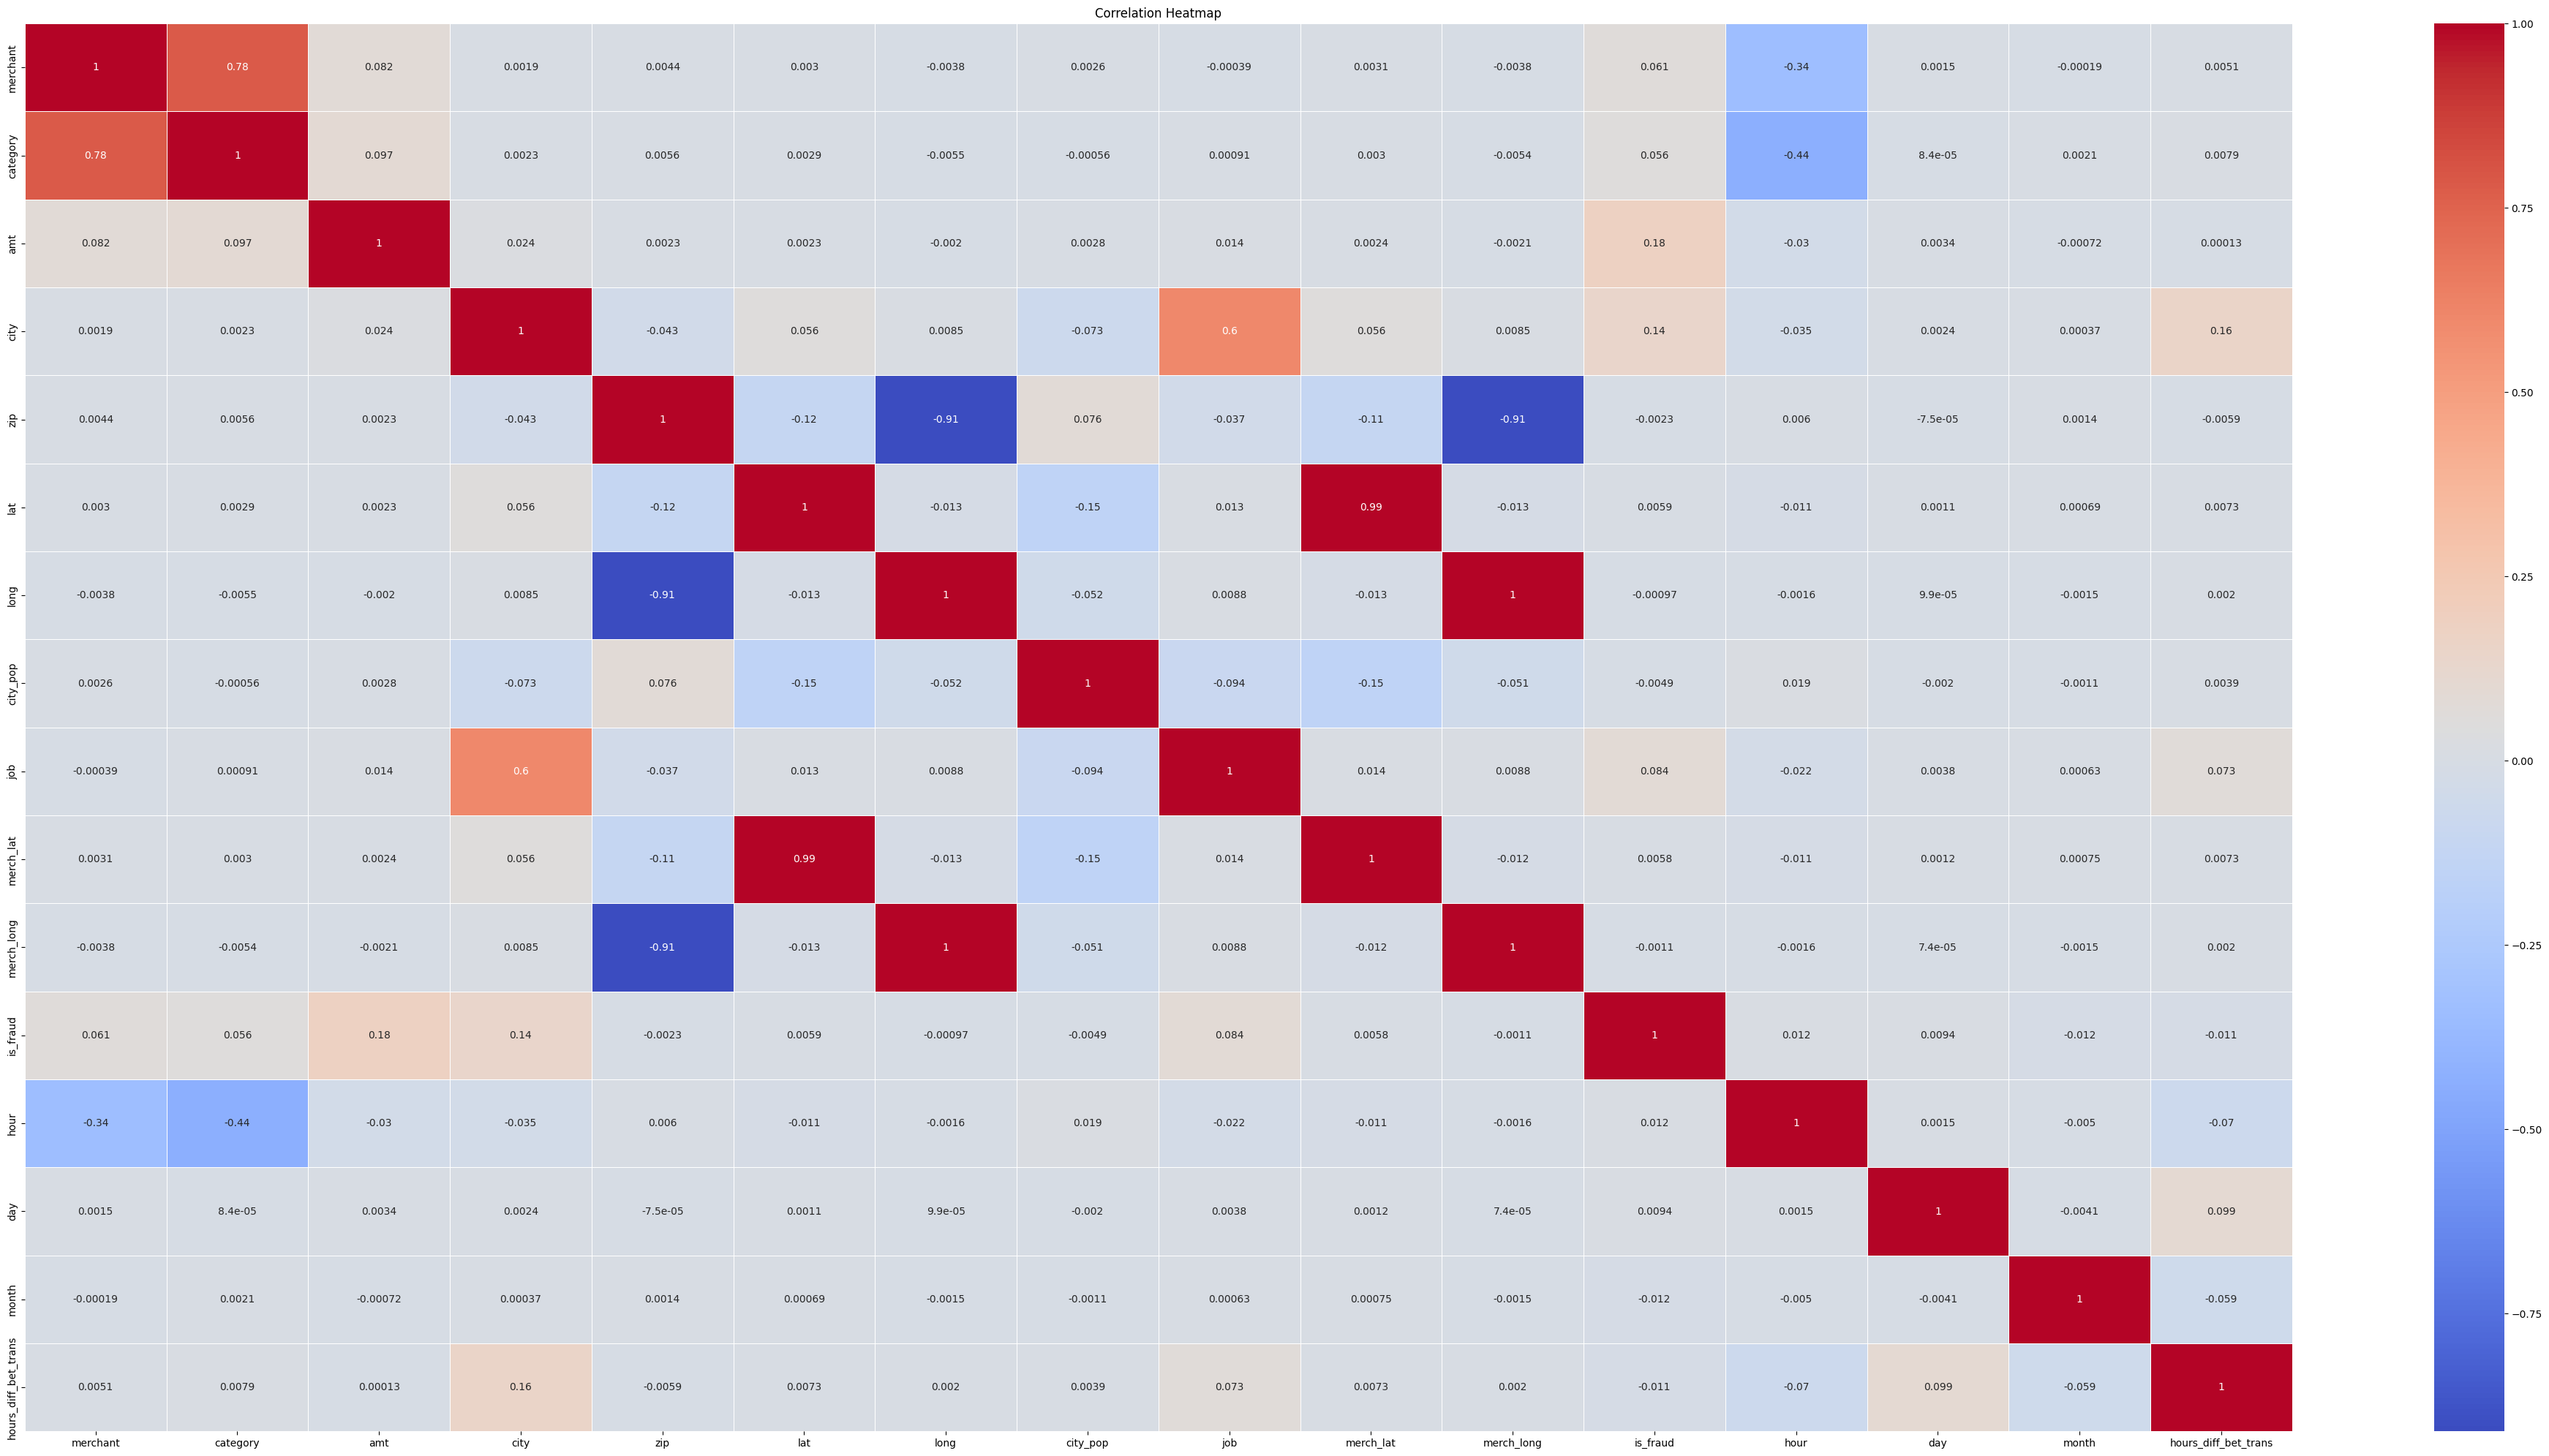

In [213]:
correlation_matrix = df.corr()
plt.figure(figsize=(50,25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show() 

([<matplotlib.patches.Wedge at 0x1f6bf39e610>,
 [Text(6.735557395310444e-17, 1.1, '0.0'),
  Text(-2.0206672185931328e-16, -1.1, '1.0')],
 [Text(3.6739403974420595e-17, 0.6, '50.0%'),
  Text(-1.1021821192326178e-16, -0.6, '50.0%')])

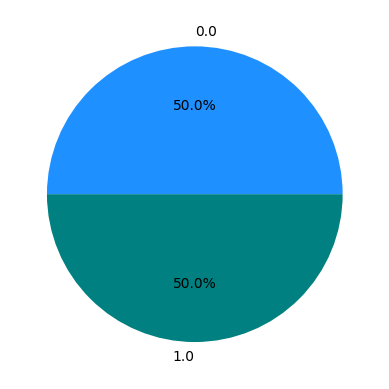

In [214]:
count=df2["is_fraud"].value_counts()
count
a1=["dodgerblue","teal"]
plt.pie(count,labels=count.index,autopct="%1.1f%%",colors=a1) 

here i analyze that fraud values are 50% and non-fraud values are 50%

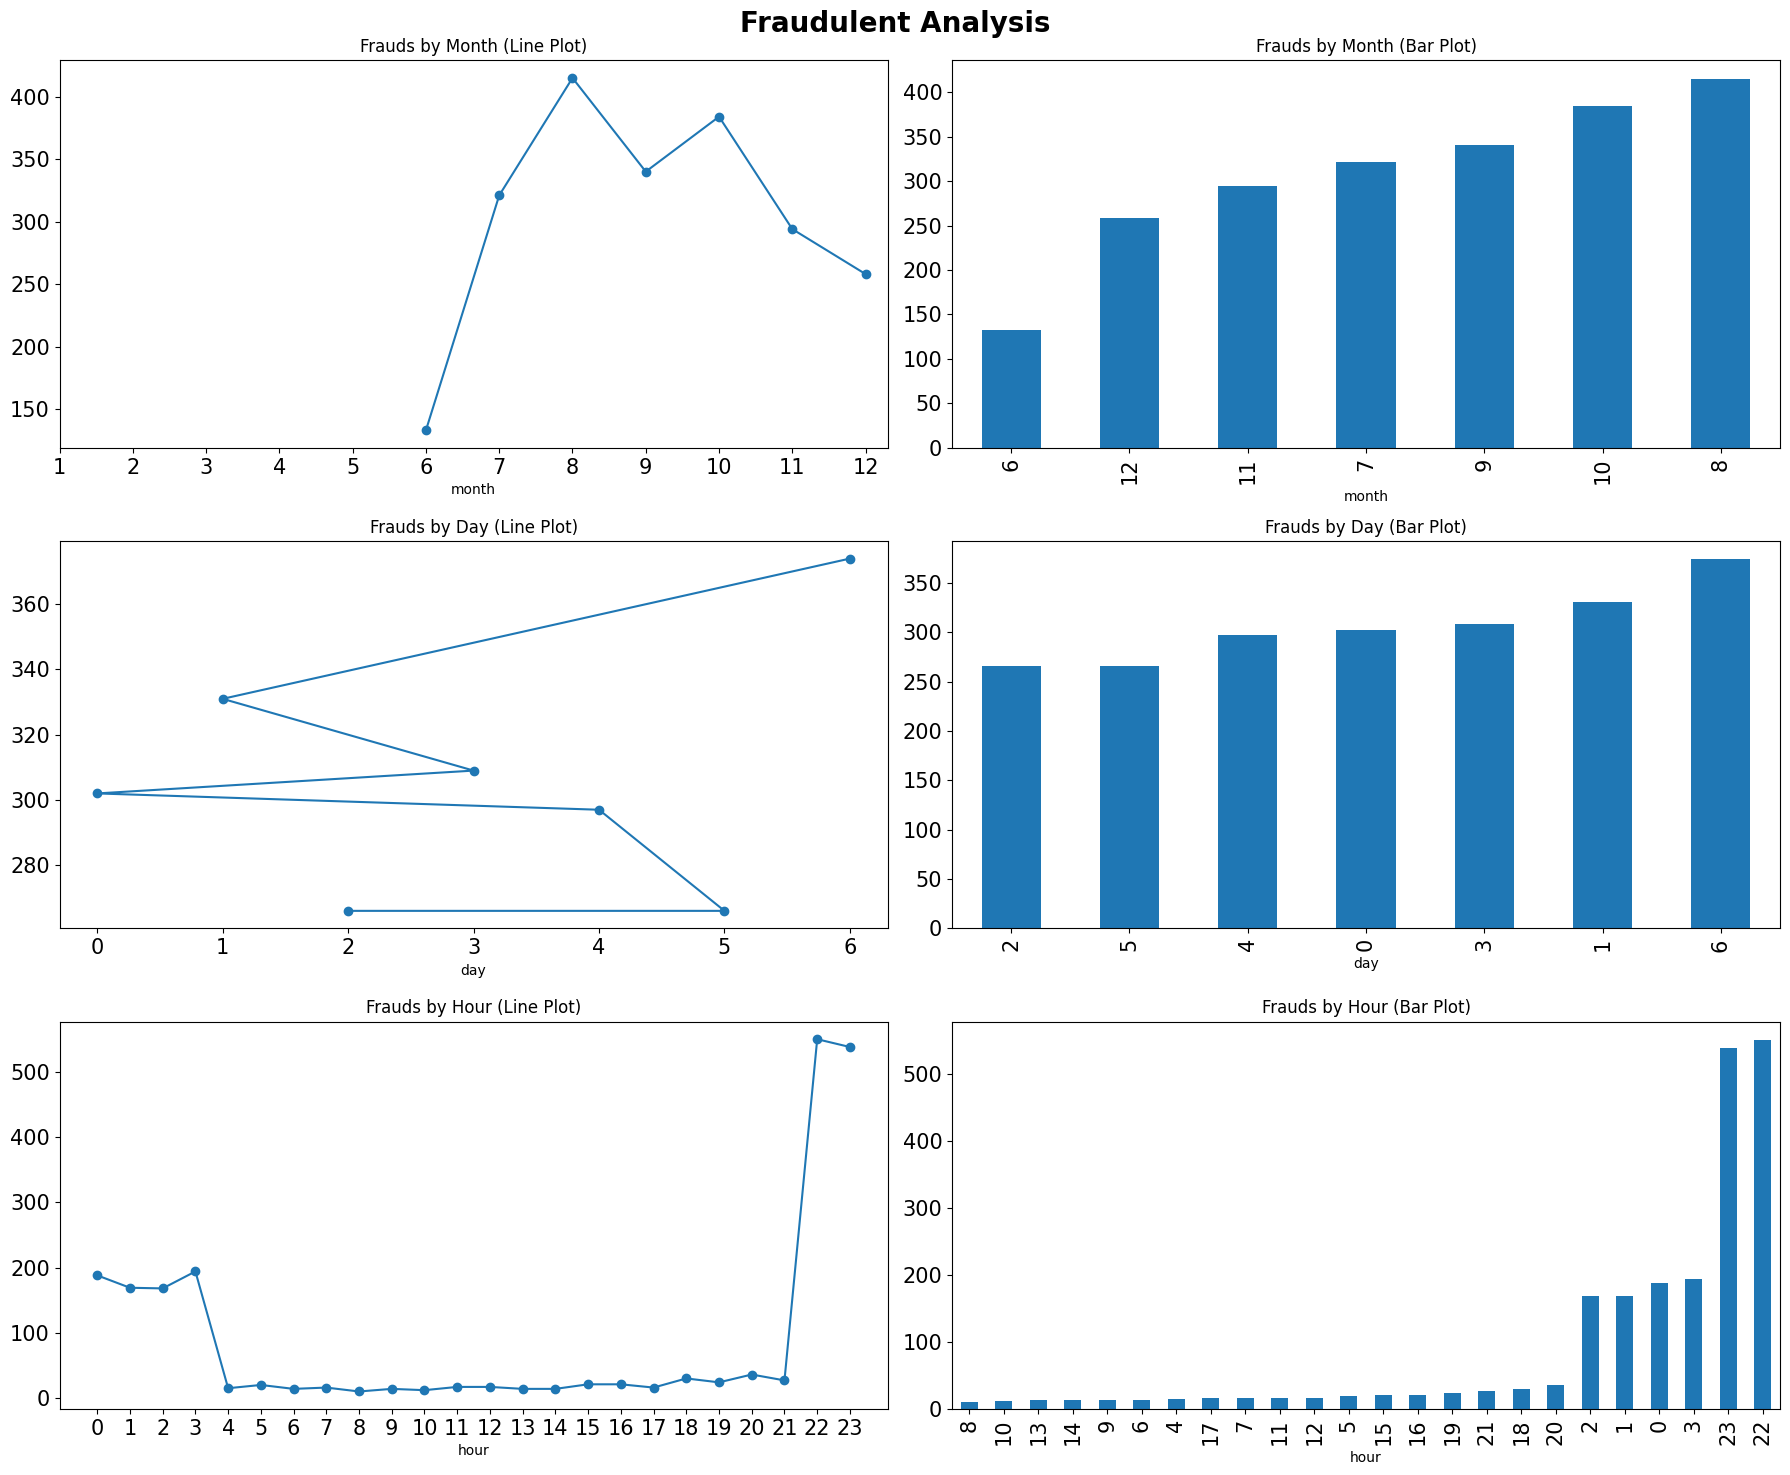

In [215]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(18, 15))
axs = fig.subplots(3, 2)

# Month
df.loc[df1['is_fraud'] == 1, 'month'].value_counts().sort_index().plot(
    kind='line', ax=axs[0, 0], marker='o', fontsize=15
)
axs[0, 0].set_xticks(range(1, 13))
axs[0, 0].set_title('Frauds by Month (Line Plot)')

df.loc[df1['is_fraud'] == 1, 'month'].value_counts(ascending=True).plot(
    kind='bar', ax=axs[0, 1], fontsize=15
)
axs[0, 1].set_title('Frauds by Month (Bar Plot)')

# Day
df.loc[df1['is_fraud'] == 1, 'day'].value_counts(ascending=True).plot(
    kind='line', ax=axs[1, 0], marker='o', fontsize=15
)
axs[1, 0].set_title('Frauds by Day (Line Plot)')

df.loc[df1['is_fraud'] == 1, 'day'].value_counts(ascending=True).plot(
    kind='bar', ax=axs[1, 1], fontsize=15
)
axs[1, 1].set_title('Frauds by Day (Bar Plot)')

# Hour
df.loc[df1['is_fraud'] == 1, 'hour'].value_counts().sort_index().plot(
    kind='line', ax=axs[2, 0], marker='o', fontsize=15
)
axs[2, 0].set_xticks(range(0, 24))
axs[2, 0].set_title('Frauds by Hour (Line Plot)')

df.loc[df1['is_fraud'] == 1, 'hour'].value_counts(ascending=True).plot(
    kind='bar', ax=axs[2, 1], fontsize=15
)
axs[2, 1].set_title('Frauds by Hour (Bar Plot)')

fig.suptitle('Fraudulent Analysis', fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()  

here we conclude that the most fraud

on august

on sunday

at 10 pm

C:\Users\sanyu\AppData\Local\Temp\ipykernel_13868\2691935558.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='is_fraud', y='city_pop',errorbar=None,palette="Set1")


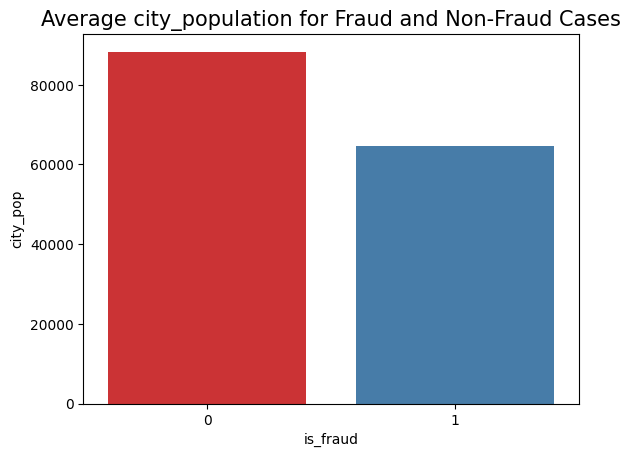

In [216]:
sns.barplot(data=df,x='is_fraud', y='city_pop',errorbar=None,palette="Set1")
plt.title('Average city_population for Fraud and Non-Fraud Cases',fontsize=15)
plt.show()

fraud_population = df[df['is_fraud'] == 1]['city_pop']
non_fraud_population = df[df['is_fraud'] == 0]['city_pop'] 

here we conclude that fraud is in low population.

([<matplotlib.patches.Wedge at 0x1f6cf99b4d0>,
 [Text(1.0446178691831312, 0.34463532521100493, 'gas_transport'),
  Text(0.6537002311849657, 0.88468978051559, 'grocery_pos'),
  Text(0.04767182398475028, 1.098966513228664, 'home'),
  Text(-0.5599202314684976, 0.9468312069171909, 'shopping_pos'),
  Text(-0.9756904114117868, 0.5079647833059872, 'kids_pets'),
  Text(-1.0994562772711205, -0.03458170570011265, 'shopping_net'),
  Text(-0.9683079664625056, -0.5219000690603971, 'entertainment'),
  Text(-0.6457570850979872, -0.8905042319078282, 'personal_care'),
  Text(-0.20028519186374438, -1.081612611760839, 'food_dining'),
  Text(0.26811025830805385, -1.0668256133923617, 'health_fitness'),
  Text(0.6648257293369165, -0.8763599429524589, 'misc_pos'),
  Text(0.9251193038290223, -0.5951086234318111, 'misc_net'),
  Text(1.0485341087170637, -0.3325300330149343, 'grocery_net'),
  Text(1.0946526196873645, -0.10833116916008288, 'travel')],
 [Text(0.5697915650089805, 0.18798290466054812, '10.1%'),
  Te

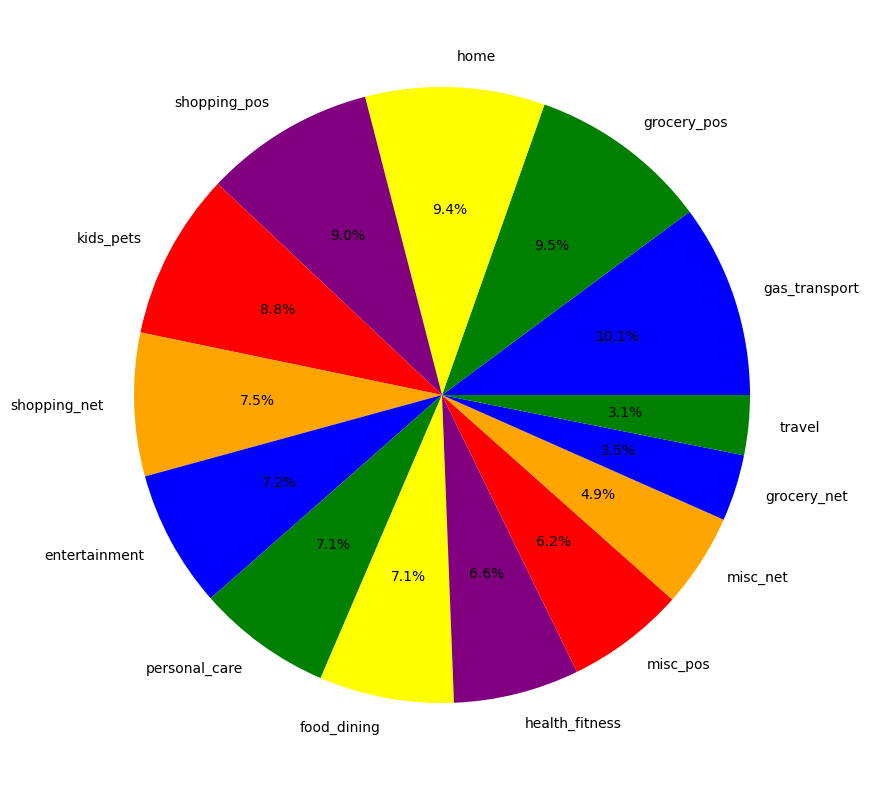

In [217]:
count=df1["category"].value_counts()
count
plt.figure(figsize=(10, 10))
a5=["blue","green","yellow","purple","red","orange"]
plt.pie(count,labels=count.index,autopct="%1.1f%%",colors=a5)

here amount is more use for grocery purpose.

<Axes: xlabel='month', ylabel='amt'>

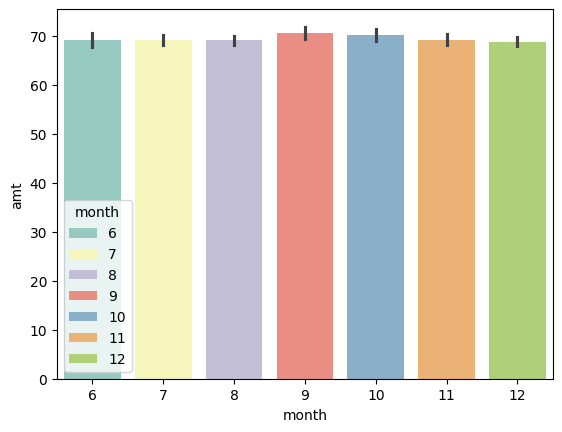

In [218]:
sns.barplot(x="month",y="amt",data=df,palette="Set3",hue="month") 

here i say that maximum amount is withdraw in 9 th month

([<matplotlib.patches.Wedge at 0x1f6cf9d5d90>,
 [Text(-0.16741184129048312, 1.0871859433398365, 'F'),
  Text(0.16741184129048323, -1.0871859433398365, 'M')],
 [Text(-0.09131554979480896, 0.5930105145490017, '54.9%'),
  Text(0.09131554979480903, -0.5930105145490017, '45.1%')])

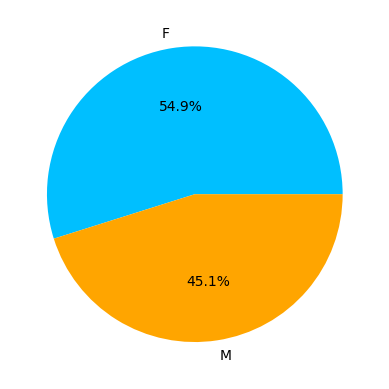

In [219]:
count=df1["gender"].value_counts()
count
a=["deepskyBlue","orange"]
plt.pie(count,labels=count.index,autopct="%1.1f%%",colors=a) 

here female is more than male

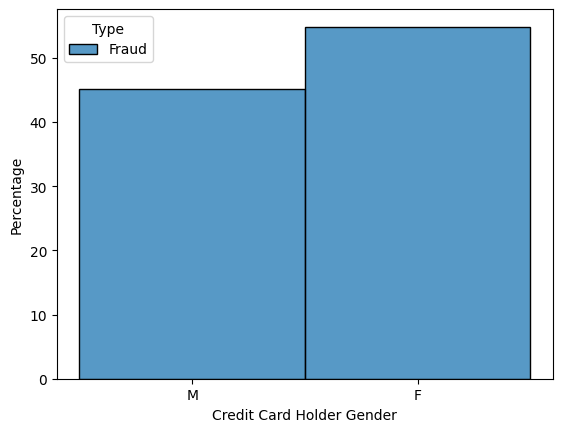

In [220]:
ax=sns.histplot(x='gender',data=df1,stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud']) 

fraud happen with in female category is more than men.

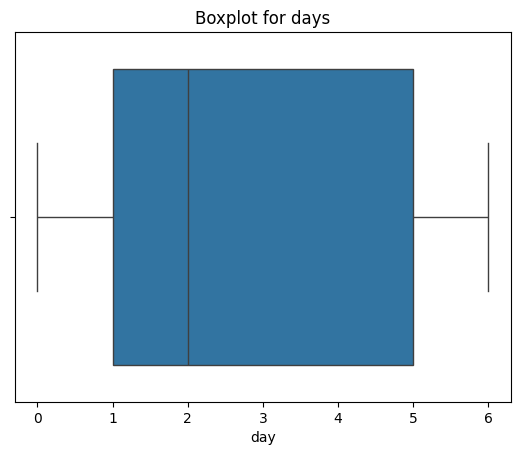

In [244]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='day', data=df)
plt.title('Boxplot for days')
plt.show()            

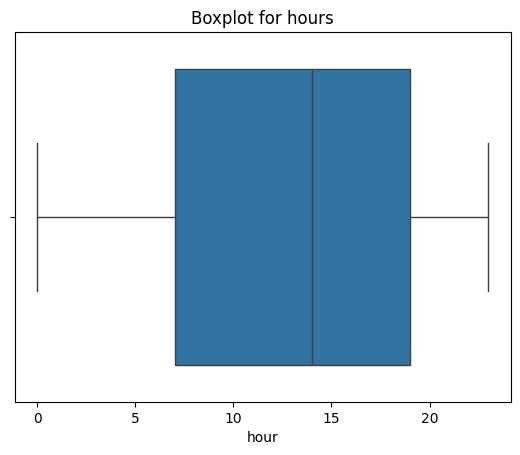

In [245]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='hour', data=df)
plt.title('Boxplot for hours')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.2, stratify=Y1, random_state=5) 

In [22]:
X1

,merchant,category,amt,city,zip,lat,long,city_pop,job,merch_lat,merch_long,hour,day,month,hours_diff_bet_trans
0,0.340113,-0.762903,2.860000,-0.910702,29209,33.9659,-80.9355,333497,-2.243730,33.986391,-81.200714,12,6,6,0
1,-0.420209,-0.762903,29.840000,-1.178691,84002,40.3207,-110.4360,302,-2.286016,39.450498,-109.960431,12,6,6,0
2,-0.381243,-0.985812,41.280000,-1.426818,11710,40.6729,-73.5365,34496,0.472088,40.495810,-74.196111,12,6,6,0
3,0.374766,-0.606015,60.050000,1.467115,32780,28.5697,-80.8191,54767,1.467115,28.812398,-80.883061,12,6,6,0
4,0.331972,-0.498900,3.190000,-1.241139,49632,44.2529,-85.0170,1126,-1.241139,44.959148,-85.884734,12,6,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107143,1.264245,1.152850,1150.961891,2.809009,48154,42.3958,-83.3772,96942,2.809009,42.240198,-83.274295,22,6,10,3
1107144,0.524084,-0.035648,110.011773,0.625074,85086,33.8155,-112.1202,1312922,0.761197,34.267898,-112.591853,14,2,10,0
1107145,0.759365,0.572969,821.790158,0.671421,75048,32.9643,-96.6012,20328,0.465503,33.415676,-97.234183,18,1,10,16
1107146,0.461949,0.121619,860.517266,1.324683,20634,38.2674,-76.4954,5927,1.691598,39.126214,-76.285845,23,6,12,0


In [222]:
logistic_regression=LogisticRegression()
logistic_regression.fit(X_train,Y_train)
y_pred_lr= logistic_regression.predict(X_test)
accuracy_logistic = accuracy_score(Y_test, y_pred_lr)
print("accuracy is ",accuracy_logistic) 
print(classification_report(Y_test, y_pred_lr))
print(confusion_matrix(Y_test, y_pred_lr)) 

accuracy is  0.8542925529512713
              precision    recall  f1-score   support

           0       0.80      0.95      0.87    110715
           1       0.94      0.76      0.84    110715

    accuracy                           0.85    221430
   macro avg       0.87      0.85      0.85    221430
weighted avg       0.87      0.85      0.85    221430

[[105084   5631]
 [ 26633  84082]]


In [223]:
DecisionTree=DecisionTreeClassifier(max_depth=3)
DecisionTree.fit(X_train,Y_train)
y_pred_dt = DecisionTree.predict(X_test)
accuracy_dt = accuracy_score(Y_test, y_pred_dt)
print("accuracy is ",accuracy_dt)
print(classification_report(Y_test, y_pred_dt))
print(confusion_matrix(Y_test, y_pred_dt))

accuracy is  0.9086528474009845
              precision    recall  f1-score   support

           0       0.99      0.83      0.90    110715
           1       0.85      0.99      0.92    110715

    accuracy                           0.91    221430
   macro avg       0.92      0.91      0.91    221430
weighted avg       0.92      0.91      0.91    221430

[[ 91549  19166]
 [  1061 109654]]


In [224]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
models = ['Logistic Regression', 'Decision Tree']
results = []

In [225]:
for model, preds in zip(models, [y_pred_lr, y_pred_dt]):
    accuracy = accuracy_score(Y_test, preds)
    precision = precision_score(Y_test, preds, average='weighted')
    recall = recall_score(Y_test, preds, average='weighted')
    f1 = f1_score(Y_test, preds, average='weighted')
    
    results.append([model, accuracy, precision, recall, f1]) 

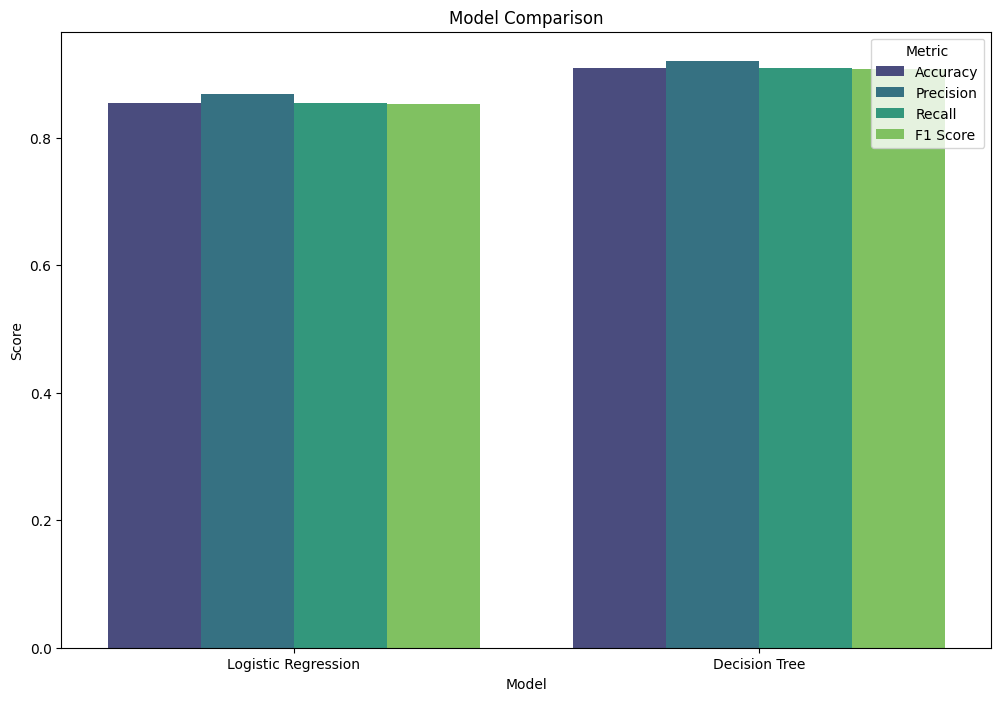

In [226]:
data = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
data_melted = pd.melt(data, id_vars='Model', var_name='Metric', value_name='Score')
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=data_melted, palette='viridis')
plt.title('Model Comparison')
plt.ylabel('Score')
plt.show() 

In [227]:
from sklearn.metrics import recall_score, confusion_matrix
conf_matrix = confusion_matrix(Y_test, y_pred_dt)
recall = recall_score(Y_test, y_pred_dt)
true_positives = conf_matrix[1, 1]
false_negatives = conf_matrix[1, 0]
recall = true_positives / (true_positives + false_negatives)
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
precision = precision_score(Y_test, y_pred_dt)
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]
precision = true_positives / (true_positives + false_positives)
f1 = 2 * (precision * recall) / (precision + recall)
f1 = f1_score(Y_test, y_pred_dt)
print("F1 Score for decision tree:", f1)
print("Recall for decision tree:", recall)
print("Precision decision tree:", precision)

F1 Score for decision tree: 0.9155572254576576
Recall for decision tree: 0.9904168360204127
Precision decision tree: 0.8512187548517312


In [228]:
from sklearn.metrics import recall_score, confusion_matrix
conf_matrix = confusion_matrix(Y_test, y_pred_lr)
recall = recall_score(Y_test, y_pred_lr)
true_positives = conf_matrix[1, 1]
false_negatives = conf_matrix[1, 0]
recall = true_positives / (true_positives + false_negatives)
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
precision = precision_score(Y_test, y_pred_lr)
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]
precision = true_positives / (true_positives + false_positives)
f1 = 2 * (precision * recall) / (precision + recall)
f1 = f1_score(Y_test, y_pred_lr)
print("F1 Score for logistic Regression:", f1)
print("Recall for logistic Regression:", recall)
print("Precision logistic Regression:", precision)

F1 Score for logistic Regression: 0.8390244875965435
Recall for logistic Regression: 0.7594454229327553
Precision logistic Regression: 0.9372331769085863


In [253]:
import pickle

In [255]:
with open('credit_card_fraud_final.pkl', 'wb') as file:
    pickle.dump(DecisionTree, file) 